In [ ]:
[1]*10**10 #get more ram quickly

In [2]:
from google.colab import drive
 
drive.mount('/gdrive')
# the project's folder
%cd /gdrive/'My Drive'/CDIP Dataset

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/CDIP Dataset


In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
import os
import codecs

from nltk.corpus import stopwords

from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import accuracy_score, precision_score,f1_score, recall_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from numpy.random import seed
from keras.models import Model, Sequential
from keras.layers import Embedding, Dense, Input, Conv1D, MaxPool1D, Concatenate, Flatten, Dropout
from keras.layers import Dense, GlobalAveragePooling2D, Flatten,Dropout, Concatenate, Conv1D
from keras.layers import ZeroPadding1D, Activation, GlobalMaxPool1D
from keras.regularizers import l2
from keras.applications.inception_v3 import preprocess_input
from keras.models import Model, load_model, Input
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import *
import seaborn as sns
from keras.utils import plot_model
from numpy.random import seed
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


In [114]:
ensemble_labels = ['Adver','email','handwriten','letter']

In [140]:
#for training data
train_texts = []
train_labels = []
train_image = []
not_read=[]
include_extension =['txt']
#train_dir = os.path.join(Dataset_Dir,'train')
for label_index, label_name in enumerate(ensemble_labels):
  base = '/gdrive/My Drive/CDIP Dataset/cvl/train_data/'+label_name
  files = [fn for fn in os.listdir(base) if any(fn.endswith(ext) for ext in include_extension)]
  for  file in files:
    
    fr = codecs.open(base+'/'+file,encoding='utf-8',errors='ignore')
    img_ext=file.split('.')[0]
    
    text =fr.read().replace('\n','')

    image=cv2.imread(base + '/' + img_ext + '.tif')
    image = cv2.resize(image, (229,229))
    train_image.append(image)
    train_texts.append(text)
    train_labels.append(label_index)
    fr.close()
      
           
print('Length of Training Text: %s' % len(train_texts))
print('Length of  Training Labels: %s' % len(train_labels))

/gdrive/My Drive/CDIP Dataset/cvl/train_data/Adver
/gdrive/My Drive/CDIP Dataset/cvl/train_data/email
/gdrive/My Drive/CDIP Dataset/cvl/train_data/handwriten
/gdrive/My Drive/CDIP Dataset/cvl/train_data/letter
Length of Training Text: 1310
Length of  Training Labels: 1310


In [141]:
#for training data
test_texts = []
test_labels = []
test_image = []
include_extension =['txt']

for label_index, label_name in enumerate(ensemble_labels):
  base = '/gdrive/My Drive/CDIP Dataset/cvl/test_data/'+label_name
  #text files selection
  files = [fn for fn in os.listdir(base) if any(fn.endswith(ext) for ext in include_extension)]
  for  file in files:

    fr = codecs.open(base+'/'+file,encoding='utf-8',errors='ignore')
    img_ext=file.split('.')[0]
    image=cv2.imread(base + '/' + img_ext + '.tif')
    image = cv2.resize(image, (229,229))
    test_image.append(image)
    test_texts.append(fr.read().replace('\n', ''))
    test_labels.append(label_index)
    fr.close()
      
           
print('Length of Test Text: %s' % len(test_texts))
print('Length of  Test Labels: %s' % len(test_labels))

Length of Test Text: 189
Length of  Test Labels: 189


In [117]:
corpus =train_texts + test_texts

In [119]:
maxlen = 200    #doc len
# loading the vocab 
import pickle
with open('/gdrive/My Drive/CDIP Dataset/cvl/Vocab/tokenizer_voc.pickle', 'rb') as tokenizer_vocab:
  tokenizer = pickle.load(tokenizer_vocab)
tokenizer.fit_on_texts(corpus)   
print('Found %s unique tokens.' % len(tokenizer.word_index))


train_texts = np.asarray(tokenizer.texts_to_sequences(train_texts))
test_texts = np.asarray(tokenizer.texts_to_sequences(test_texts))


train_texts = pad_sequences(train_texts, maxlen=maxlen)
test_texts = pad_sequences(test_texts, maxlen=maxlen)


train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels )


X_train, y_train = train_texts, train_labels
X_test, y_test = test_texts, test_labels

Found 35511 unique tokens.


In [121]:
for i in range(len(train_image)):
  image = preprocess_input(train_image[i]) 
  train_image[i] = image

for i in range(len(test_image)):
  image = preprocess_input(test_image[i]) 
  test_image[i] = image
    
    
train_image = np.asarray(train_image)
test_image = np.asarray(test_image)

In [122]:
y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

In [142]:
model_weights ='/gdrive/My Drive/CDIP Dataset/cvl/text_model_cvl_cdip.hdf5' 
model_text = load_model(model_weights)
layers = model_text.layers
for layer in layers:
  print(layer.name)

input_1
embedding
embedding_1
embedding_2
zero_padding1d
zero_padding1d_1
zero_padding1d_2
zero_padding1d_3
zero_padding1d_4
zero_padding1d_5
conv1d
conv1d_1
conv1d_2
conv1d_3
conv1d_4
conv1d_5
global_max_pooling1d
global_max_pooling1d_1
global_max_pooling1d_2
global_max_pooling1d_3
global_max_pooling1d_4
global_max_pooling1d_5
concatenate
dense
dense_1


In [143]:
model_weights ='/gdrive/My Drive/CDIP Dataset/cvl/image_cvl_cdip.hdf5' 
model_image= load_model(model_weights)
layers = model_image.layers
for layer in layers:
  print(layer.name)

input_3
conv2d_188
batch_normalization_188
activation_188
conv2d_189
batch_normalization_189
activation_189
conv2d_190
batch_normalization_190
activation_190
max_pooling2d_8
conv2d_191
batch_normalization_191
activation_191
conv2d_192
batch_normalization_192
activation_192
max_pooling2d_9
conv2d_196
batch_normalization_196
activation_196
conv2d_194
conv2d_197
batch_normalization_194
batch_normalization_197
activation_194
activation_197
average_pooling2d_18
conv2d_193
conv2d_195
conv2d_198
conv2d_199
batch_normalization_193
batch_normalization_195
batch_normalization_198
batch_normalization_199
activation_193
activation_195
activation_198
activation_199
mixed0
conv2d_203
batch_normalization_203
activation_203
conv2d_201
conv2d_204
batch_normalization_201
batch_normalization_204
activation_201
activation_204
average_pooling2d_19
conv2d_200
conv2d_202
conv2d_205
conv2d_206
batch_normalization_200
batch_normalization_202
batch_normalization_205
batch_normalization_206
activation_200
activa

In [127]:

model_weights1 ='/gdrive/My Drive/CDIP Dataset/cvl/text_model_cvl_cdip.hdf5' 
model_text = load_model(model_weights1)
layers = model_text.layers

for layer in model_text.layers:
  if layer.name == 'concatenate':
    layer._name = 'concatenate_'


model_weights2 = '/gdrive/My Drive/CDIP Dataset/cvl/image_cvl_cdip.hdf5'
model_image = load_model(model_weights2)
layer = model_image.get_layer('dense_1')
layer._name = 'dense_3'

avg=tf.keras.layers.Average()([model_image.get_layer('dense_5').output, model_text.get_layer('dense_3').output])
#conc = Concatenate(axis=1, name='concatenate')([image_model.get_layer('dense_5').output, text_model.get_layer('dense_3').output])

In [128]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [129]:
checkpoint = ModelCheckpoint("/gdrive/My Drive/CDIP Dataset/cvl/model/final.h5",
      monitor="val_acc",
      mode="min",
     save_best_only = True,
      verbose=1)

earlystop = EarlyStopping(monitor = 'val_acc', 
     min_delta = 0, 
    patience = 8,
     verbose = 1,
   restore_best_weights = True)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

In [133]:
preds =Dense(4 ,activation='softmax', name='dense_')(avg)

model_comb = Model(inputs=[model_image.input, model_text.input], outputs=preds)


model_comb.compile(optimizer = RMSprop(lr = 0.001), loss='categorical_crossentropy', metrics=['acc'])
model_comb.fit([train_image, X_train], y_train,
                   epochs=100,
                   batch_size=32,
                   callbacks=callbacks,
                   validation_data=([test_image, X_test], y_test),
                   verbose=1)

Epoch 1/100
41/41 [==============================] - ETA: 0s - loss: 1.3544 - acc: 0.2733
Epoch 00001: val_acc improved from inf to 0.25397, saving model to /gdrive/My Drive/CDIP Dataset/cvl/model/final.h5
41/41 [==============================] - 9s 209ms/step - loss: 1.3544 - acc: 0.2733 - val_loss: 1.3685 - val_acc: 0.2540
Epoch 2/100
41/41 [==============================] - ETA: 0s - loss: 1.2946 - acc: 0.2733
Epoch 00002: val_acc did not improve from 0.25397
41/41 [==============================] - 5s 118ms/step - loss: 1.2946 - acc: 0.2733 - val_loss: 1.3590 - val_acc: 0.2540
Epoch 3/100
41/41 [==============================] - ETA: 0s - loss: 1.2653 - acc: 0.2809
Epoch 00003: val_acc did not improve from 0.25397
41/41 [==============================] - 5s 123ms/step - loss: 1.2653 - acc: 0.2809 - val_loss: 1.3397 - val_acc: 0.2857
Epoch 4/100
41/41 [==============================] - ETA: 0s - loss: 1.2387 - acc: 0.4626
Epoch 00004: val_acc did not improve from 0.25397
41/41 [====

In [134]:
res = model_comb.evaluate([test_image, X_test], y_test)
print(res)
y_preds=model_comb.predict([test_image, X_test],batch_size=32, verbose=1)


6/6 [==============================] - 0s 31ms/step - loss: 0.5304 - acc: 0.9259
[0.5303651690483093, 0.9259259104728699]
6/6 [==============================] - 0s 29ms/step
[[44  0  1  0]
 [ 0 48  0  0]
 [ 8  0 46  0]
 [ 0  2  3 37]]


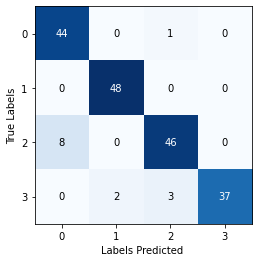

In [145]:
conf_matrix = confusion_matrix(y_target=y_test.argmax(axis=1),
                      y_predicted=y_preds.argmax(axis=1),
                      binary=False)

figure, axes = plot_confusion_matrix(conf_mat=conf_matrix)
plt.xlabel('Labels Predicted ')
plt.ylabel('True Labels')
plt.show()
